In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Collect Weather Data

In [ ]:
import os
os.chdir("drive/My Drive/Agriculture/Data")

In [ ]:
!ls


 3457   3678		    Manitoba-Crop-Districts.png    weather.py
 3518   3766		    Manitoba_Provincial_Boundary   weather_stations_map.png
 3667   main_stations.png  'Station Inventory EN.csv'


In [ ]:
import pandas as pd
station_df = pd.read_csv("Station Inventory EN.csv")
station_df.head()

,Name,Province,Climate ID,Station ID,WMO ID,TC ID,Latitude (Decimal Degrees),Longitude (Decimal Degrees),Latitude,Longitude,Elevation (m),First Year,Last Year,HLY First Year,HLY Last Year,DLY First Year,DLY Last Year,MLY First Year,MLY Last Year
0,ACTIVE PASS,BRITISH COLUMBIA,1010066,14,NaN,NaN,48.87,-123.28,485200000.0,-1.231700e+09,4.0,1984,1996,NaN,NaN,1984.0,1996.0,1984.0,1996.0
1,ALBERT HEAD,BRITISH COLUMBIA,1010235,15,NaN,NaN,48.40,-123.48,482400000.0,-1.232900e+09,17.0,1971,1995,NaN,NaN,1971.0,1995.0,1971.0,1995.0
2,BAMBERTON OCEAN CEMENT,BRITISH COLUMBIA,1010595,16,NaN,NaN,48.58,-123.52,483500000.0,-1.233100e+09,85.3,1961,1980,NaN,NaN,1961.0,1980.0,1961.0,1980.0
3,BEAR CREEK,BRITISH COLUMBIA,1010720,17,NaN,NaN,48.50,-124.00,483000000.0,-1.240000e+09,350.5,1910,1971,NaN,NaN,1910.0,1971.0,1910.0,1971.0
4,BEAVER LAKE,BRITISH COLUMBIA,1010774,18,NaN,NaN,48.50,-123.35,483000000.0,-1.232100e+09,61.0,1894,1952,NaN,NaN,1894.0,1952.0,1894.0,1952.0


In [ ]:
mn_stn_df = station_df[station_df.Province=="MANITOBA"]
mn_stn_df.head()

,Name,Province,Climate ID,Station ID,WMO ID,TC ID,Latitude (Decimal Degrees),Longitude (Decimal Degrees),Latitude,Longitude,Elevation (m),First Year,Last Year,HLY First Year,HLY Last Year,DLY First Year,DLY Last Year,MLY First Year,MLY Last Year
4540,ALEXANDER,MANITOBA,5010033,3461,NaN,NaN,49.83,-100.30,495000000.0,-1.001800e+09,427.0,1979,1999,NaN,NaN,1979.0,1999.0,1979.0,1999.0
4541,ARROW RIVER,MANITOBA,5010114,3462,NaN,NaN,50.17,-100.85,501000000.0,-1.005100e+09,486.2,1982,1983,NaN,NaN,1982.0,1983.0,1982.0,1983.0
4542,BALDUR,MANITOBA,5010140,3463,NaN,NaN,49.28,-99.29,491634900.0,-9.917325e+08,449.9,1962,2023,NaN,NaN,1962.0,2023.0,1962.0,2007.0
4543,BALDUR 5 NORTHEAST,MANITOBA,5010143,6880,NaN,NaN,49.42,-99.17,492500000.0,-9.910000e+08,425.3,1991,1995,NaN,NaN,1991.0,1995.0,1991.0,1995.0
4544,BEDE,MANITOBA,5010180,3464,NaN,NaN,49.37,-100.93,492200000.0,-1.005600e+09,442.0,1956,1977,NaN,NaN,1956.0,1977.0,1956.0,1977.0


In [ ]:
indexes = mn_stn_df[(mn_stn_df['First Year']>1988) | (mn_stn_df['Last Year']<2022)].index
mn_stn_df = mn_stn_df.drop(indexes)
mn_stn_df = mn_stn_df.drop(['Latitude','Longitude'],axis=1)
mn_stn_df = mn_stn_df.rename(columns={'Latitude (Decimal Degrees)':'Latitude','Longitude (Decimal Degrees)':'Longitude'})
mn_stn_df.head()

,Name,Province,Climate ID,Station ID,WMO ID,TC ID,Latitude,Longitude,Elevation (m),First Year,Last Year,HLY First Year,HLY Last Year,DLY First Year,DLY Last Year,MLY First Year,MLY Last Year
4542,BALDUR,MANITOBA,5010140,3463,NaN,NaN,49.28,-99.29,449.9,1962,2023,NaN,NaN,1962.0,2023.0,1962.0,2007.0
4578,ELKHORN 2 EAST,MANITOBA,5010QFQ,3460,NaN,NaN,49.93,-101.20,497.5,1987,2023,NaN,NaN,1987.0,2023.0,1987.0,2007.0
4608,PORTAGE SOUTHPORT A,MANITOBA,5012320,3518,NaN,YPG,49.90,-98.27,269.7,1941,2023,1953.0,2023.0,1941.0,1992.0,1941.0,1992.0
4609,PORTAGE LA PRAIRIE CDA,MANITOBA,5012321,3519,NaN,NaN,49.95,-98.27,259.1,1970,2023,NaN,NaN,1970.0,2023.0,1970.0,2007.0
4658,WASAGAMING,MANITOBA,5013117,3562,71444.0,WWP,50.66,-99.94,627.4,1966,2023,1994.0,2023.0,1966.0,2023.0,1966.0,2007.0


## next step is to create the map to know which stations I want to use

I'm using this map: https://geoportal.gov.mb.ca/datasets/manitoba::manitoba-provincial-boundary/about

And used this blog to do this: https://medium.com/@ianforrest11/graphing-latitudes-and-longitudes-on-a-map-bf64d5fca391

In [ ]:
# import libraries
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
# import province map
manitoba_map = gpd.read_file('./Manitoba_Provincial_Boundary/Manitoba_Provincial_Boundary.shp')
manitoba_map.crs
# Define the target CRS (e.g., EPSG:4326 for latitude and longitude)
target_crs = 'EPSG:4326'

# Transform the GeoDataFrame to the target CRS
manitoba_map = manitoba_map.to_crs(target_crs)

manitoba_map

,FID,AREA,PERIMETER,NAME,SHAPE_Leng,SHAPE_Area,geometry
0,1,6.500534e+11,4.018512e+06,Manitoba,7.051045e+06,1.980213e+12,"POLYGON ((-94.80815 59.61792, -94.81044 59.617..."


In [ ]:
# designate coordinate system
crs = {'init':'EPSG:4326'}
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(mn_stn_df['Longitude'], mn_stn_df['Latitude'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(mn_stn_df,
 crs = crs,
 geometry = geometry)
geo_df

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Name,Province,Climate ID,Station ID,WMO ID,TC ID,Latitude,Longitude,Elevation (m),First Year,Last Year,HLY First Year,HLY Last Year,DLY First Year,DLY Last Year,MLY First Year,MLY Last Year,geometry
4542,BALDUR,MANITOBA,5010140,3463,NaN,NaN,49.28,-99.29,449.9,1962,2023,NaN,NaN,1962.0,2023.0,1962.0,2007.0,POINT (-99.29000 49.28000)
4578,ELKHORN 2 EAST,MANITOBA,5010QFQ,3460,NaN,NaN,49.93,-101.20,497.5,1987,2023,NaN,NaN,1987.0,2023.0,1987.0,2007.0,POINT (-101.20000 49.93000)
4608,PORTAGE SOUTHPORT A,MANITOBA,5012320,3518,NaN,YPG,49.90,-98.27,269.7,1941,2023,1953.0,2023.0,1941.0,1992.0,1941.0,1992.0,POINT (-98.27000 49.90000)
4609,PORTAGE LA PRAIRIE CDA,MANITOBA,5012321,3519,NaN,NaN,49.95,-98.27,259.1,1970,2023,NaN,NaN,1970.0,2023.0,1970.0,2007.0,POINT (-98.27000 49.95000)
4658,WASAGAMING,MANITOBA,5013117,3562,71444.0,WWP,50.66,-99.94,627.4,1966,2023,1994.0,2023.0,1966.0,2023.0,1966.0,2007.0,POINT (-99.94000 50.66000)
4665,RIVERS PETTAPIECE,MANITOBA,501BMMA,3457,NaN,NaN,50.11,-100.18,487.5,1987,2023,NaN,NaN,1987.0,2023.0,1987.0,2007.0,POINT (-100.18000 50.11000)
4667,ROSSBURN 4 NORTH,MANITOBA,501KE01,3458,NaN,NaN,50.75,-100.82,609.6,1986,2023,NaN,NaN,1986.0,2023.0,1986.0,2007.0,POINT (-100.82000 50.75000)
4706,GRETNA (AUT),MANITOBA,5021220,3605,71441.0,WGN,49.03,-97.56,252.6,1885,2023,1994.0,2023.0,1885.0,2023.0,1885.0,2007.0,POINT (-97.56000 49.03000)
4710,HOLLAND,MANITOBA,5021302,3609,NaN,NaN,49.61,-98.88,374.9,1984,2023,NaN,NaN,1984.0,2023.0,1984.0,2007.0,POINT (-98.88000 49.61000)
4722,MARQUETTE,MANITOBA,5021695,3619,NaN,NaN,50.01,-97.81,243.8,1969,2023,NaN,NaN,1969.0,2023.0,1969.0,2007.0,POINT (-97.81000 50.01000)


-101.2
-95.2
49.03
52.67


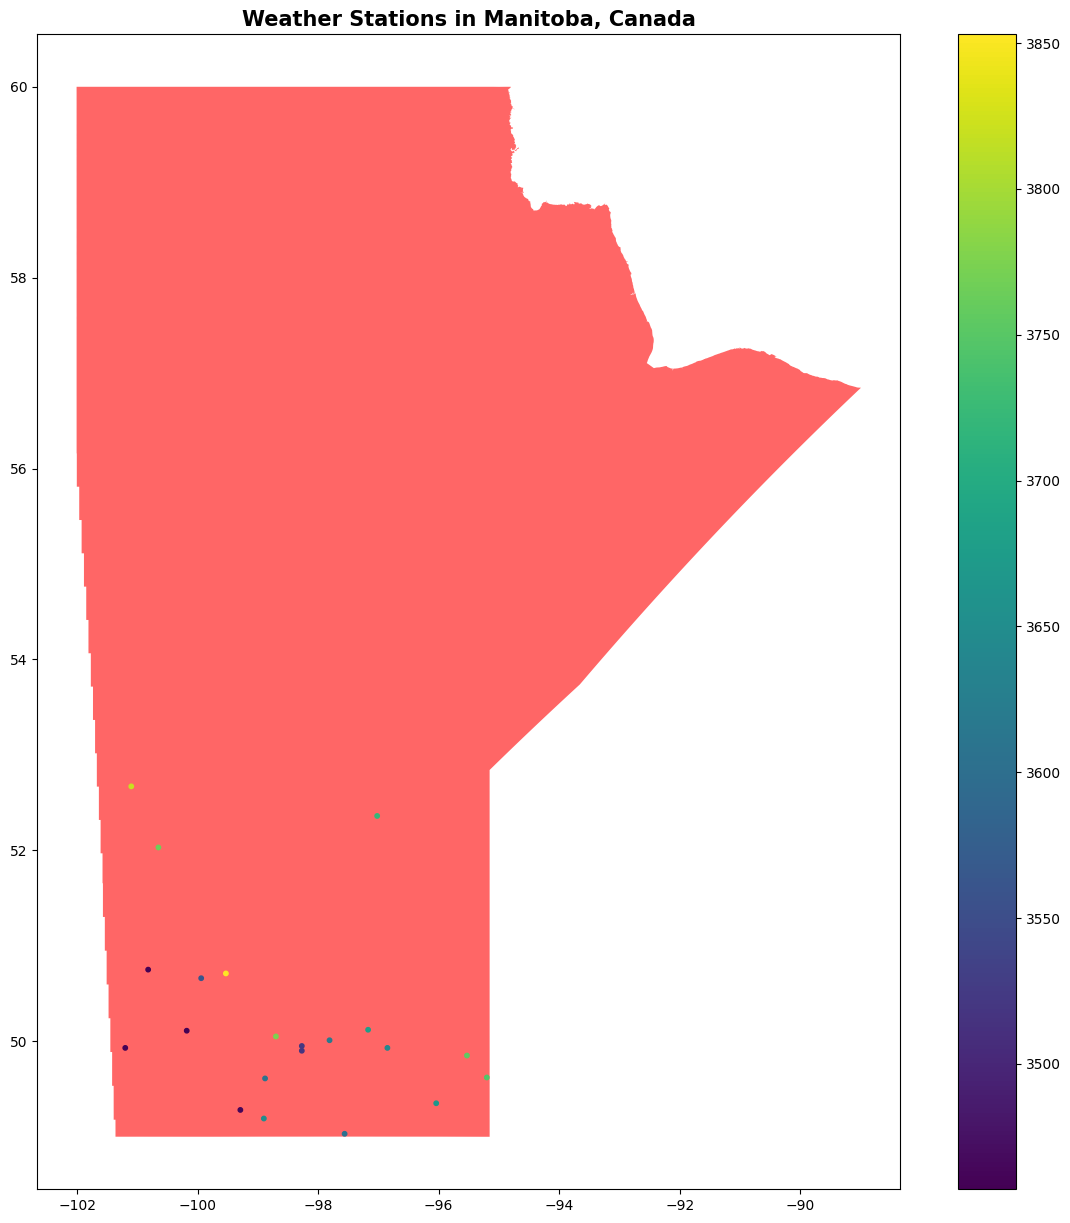

In [ ]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
# add .shp mapfile to axes
manitoba_map.plot(ax=ax, alpha=0.6,color='red')


# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize

geo_df.plot(column='Station ID',ax=ax, legend=True,markersize=10)

# # add title to graph
plt.title('Weather Stations in Manitoba, Canada', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
long_min = mn_stn_df['Longitude'].min()
long_max = mn_stn_df['Longitude'].max()
lat_min = mn_stn_df['Latitude'].min()
lat_max = mn_stn_df['Latitude'].max()
print(long_min)
print(long_max)
print(lat_min)
print(lat_max)

# plt.ylim(lat_min,lat_max)
# plt.xlim(long_min,long_max)
# show map
plt.show()

Now we should decide what stations are good to cover all the five agricultural regions:
https://manitobapulse.ca/manitoba-districts-5/

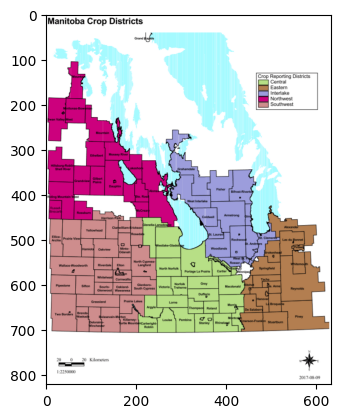

In [ ]:
img = plt.imread('Manitoba-Crop-Districts.png')
plt.imshow(img)

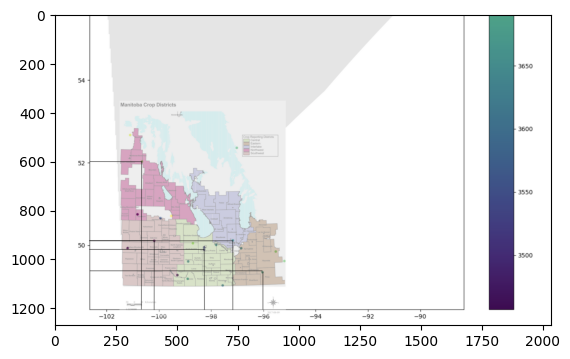

In [ ]:
img = plt.imread('main_stations.png')
plt.imshow(img)

According to the above plot, we choose five stations:

In [ ]:
station_ids = [3518,3457,3667,3678,3766]

In [ ]:
os.chdir("./3518")

In [ ]:
!ls

Download instructions: https://collaboration.cmc.ec.gc.ca/cmc/climate/Get_More_Data_Plus_de_donnees/Homebrew(MacOS)/Readme.pdf

In [ ]:
! for year in `seq 1988 2022`;do for month in `seq 1 12`;do wget --content-disposition "https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=3518&Year=${year}&Month=${month}&Day=14&timeframe=1&submit= Download+Data" ;done;done

In [ ]:
os.chdir("../3457")

In [ ]:
! for year in `seq 1988 2022`;do for month in `seq 1 12`;do wget --content-disposition "https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=3457&Year=${year}&Month=${month}&Day=14&timeframe=2&submit= Download+Data" ;done;done

In [ ]:
os.chdir("../3667")

In [ ]:
! for year in `seq 1988 2022`;do for month in `seq 1 12`;do wget --content-disposition "https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=3667&Year=${year}&Month=${month}&Day=14&timeframe=2&submit= Download+Data" ;done;done

In [ ]:
os.chdir("../3678")

In [ ]:
! for year in `seq 1988 2022`;do for month in `seq 1 12`;do wget --content-disposition "https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=3678&Year=${year}&Month=${month}&Day=14&timeframe=2&submit= Download+Data" ;done;done

In [ ]:
os.chdir("../3766")

In [ ]:
! for year in `seq 1988 2022`;do for month in `seq 1 12`;do wget --content-disposition "https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=3766&Year=${year}&Month=${month}&Day=14&timeframe=2&submit= Download+Data" ;done;done

# ARIMA

In [2]:
import os
os.chdir("drive/My Drive/Agriculture")

In [3]:
def MAPE(y_true, y_pred):

    y_true, y_pred = np.array(y_true), np.array(y_pred)

    # Avoid division by zero
    mask = y_true != 0
    y_true, y_pred = y_true[mask], y_pred[mask]

    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

In [4]:
!ls

Canola	Data  manitoba-markets-crops-prices-monthly.xlsx  manitoba-markets-crops-prices-weekly.xlsx


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
from sklearn.metrics import mean_squared_error
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter('ignore', UserWarning)

## Monthly Data Read

In [6]:
df = pd.read_excel('manitoba-markets-crops-prices-monthly.xlsx')
dates = pd.to_datetime(df.Year*10000+df.Month*100+1,format='%Y%m%d')
df = pd.concat([df,dates], axis=1)
df = df.drop(['UOM', 'Indicator','Month','Year'], axis=1)
df = df.rename(columns={0: 'Date', 'Value':'Price'})
df.set_index('Date',inplace=True)
df

,Crop,Price
Date,,
1987-08-01,"Barley, #1CW",49.45000
1987-08-01,"Canola Meal, 34%, Altona",187.43000
1987-08-01,"Canola, #1CR",206.09500
1987-08-01,"Flaxseed, #1CW",142.55000
1987-08-01,"Oats, #2CW",51.25000
...,...,...
2022-12-01,"Soymeal, 46%, Wpg",NaN
2022-12-01,"Wheat, Northern Hard Red",422.73972
2022-12-01,"Wheat, Red Winter",412.45140


! Probably should check the records for 'Soymeal, 46%, Wpg' and 'Soymeal, 46%, Wpg, 46%, Wpg'. These two might be the same.

In [7]:
crop_names = np.unique(df.Crop.values)

print(len(crop_names))
print(crop_names)
# print(df)

crop_dfs = {}
for c in crop_names:
    crop_dfs[c] = df[df.Crop==c].drop(['Crop'], axis=1)


15
['Barley, #1CW' 'Canola Meal, 34%, Altona' 'Canola, #1CR' 'Corn, #2'
 'Flaxseed, #1CW' 'Oats, #2CW' 'Peas, #2 Yellow' 'Rye, #2' 'Soybeans'
 'Soymeal, 46%, Wpg' 'Soymeal, 46%, Wpg, 46%, Wpg'
 'Wheat, Northern Hard Red' 'Wheat, Red Winter'
 'Wheat, Special Purpose (Low Vomi)' 'Wheat, Western Red Spring']


In [8]:
name = 'Canola, #1CR'
folder =  'Canola/'
d = crop_dfs['Canola, #1CR']

#check for missing timestamps
duplicated_indexes = d[d.index.duplicated(keep=False)]  # Keep=False to mark all duplicates

# Display duplicated indexes (if any)
if not duplicated_indexes.empty:
    print("Duplicated Indexes:")
    print(duplicated_indexes)
else:
    print("No duplicated indexes found.")


from scipy.interpolate import interp1d

def spline_interpolate(df):

    # Convert Date column to numeric for spline interpolation
    mask_missing = df['Price'].isnull()

    # Define x and y for interpolation (non-missing values)
    x = df.loc[~mask_missing].index.astype(int).values.astype(float)  # Convert index to numeric
    y = df.loc[~mask_missing, 'Price']

    # Perform spline interpolation
    spline = interp1d(x, y, kind='cubic', fill_value='extrapolate')

    # Impute missing values using spline interpolation
    df.loc[mask_missing, 'Price'] = spline(df.loc[mask_missing].index.astype(int).values.astype(float))

    return df

any_missing = d.isnull().any().any()
print(any_missing)

#interpolating missing values
if (any_missing):
    d = spline_interpolate(d)

#if there are missing timestamps we do this
# indexes = d[(d.index.year==1988) |(d.index.year==1987)].index
# d = d.drop(indexes)

series = d.squeeze()

No duplicated indexes found.
False


## Canola Plots (Monthly)


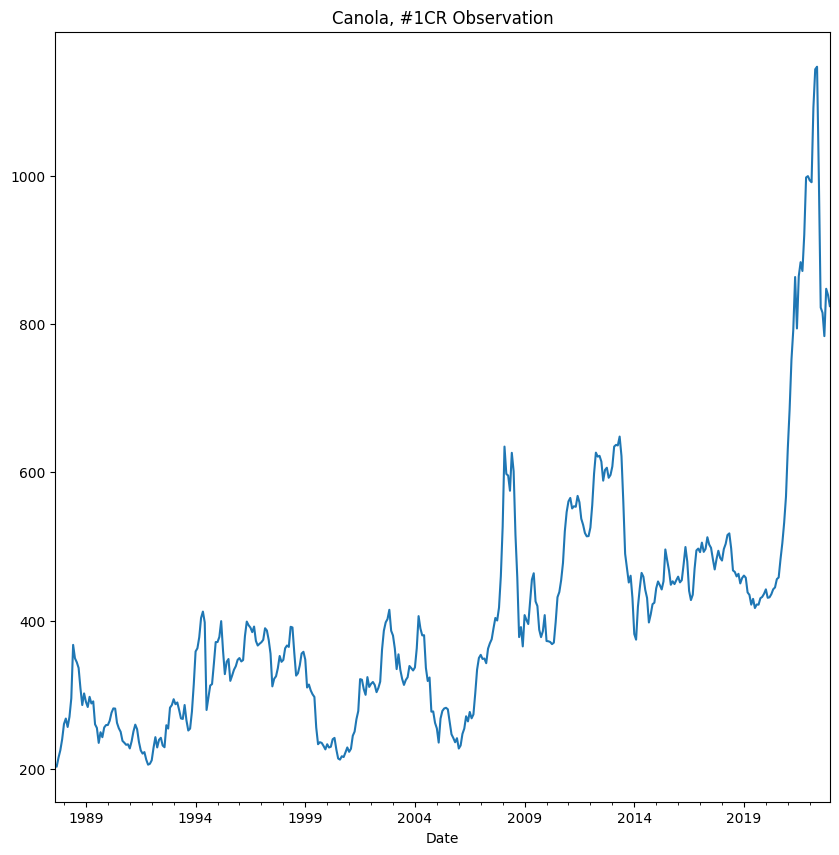

In [13]:
plt.rcParams['figure.figsize'] = [10, 10]
d['Price'].resample('M').mean().plot()
plt.title(name + ' Observation')
plt.show()
# plt.savefig(folder+'observation.png')
# plt.clf()

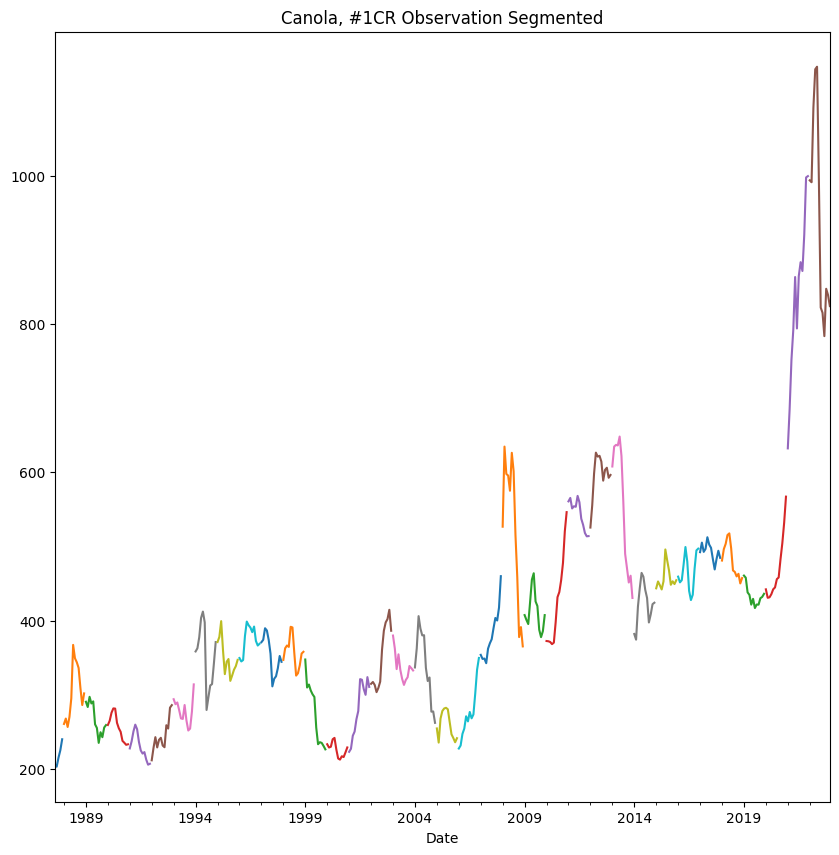

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
d.groupby(pd.Grouper(level='Date', axis=0, freq='Y')).plot(ax=ax,legend=False)
plt.title(name + ' Observation Segmented')
# plt.savefig(folder+'observation_segmented.png')
# plt.clf()
plt.show()

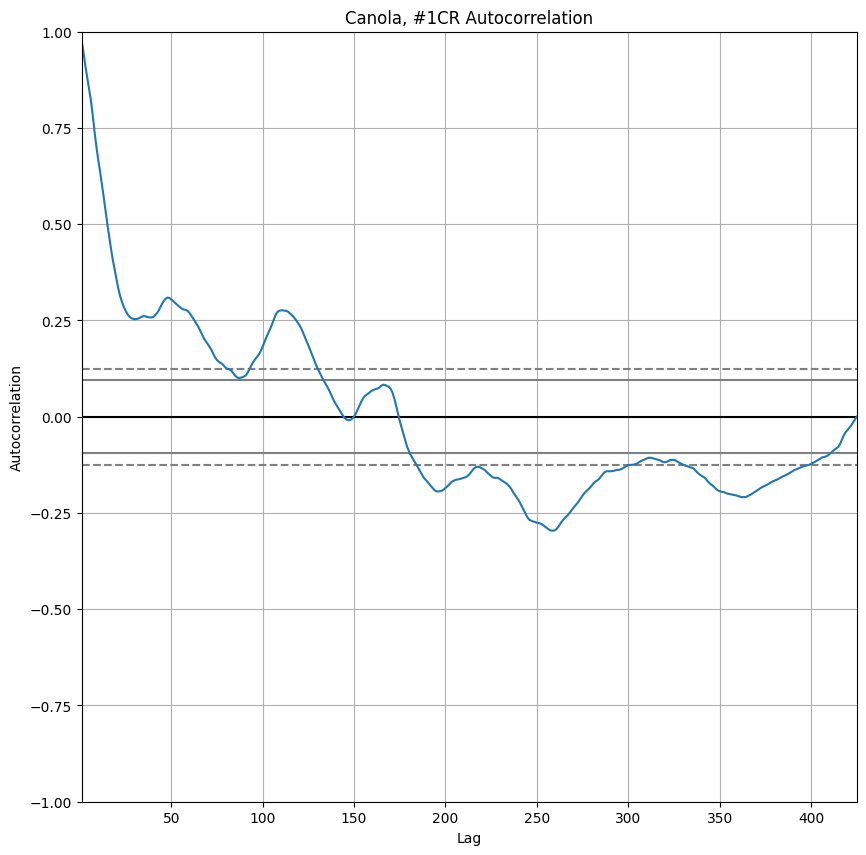

In [16]:

autocorrelation_plot(series)
plt.title(name + ' Autocorrelation')
# plt.savefig(folder+'autocorrelation.png')
# plt.clf()
plt.show()

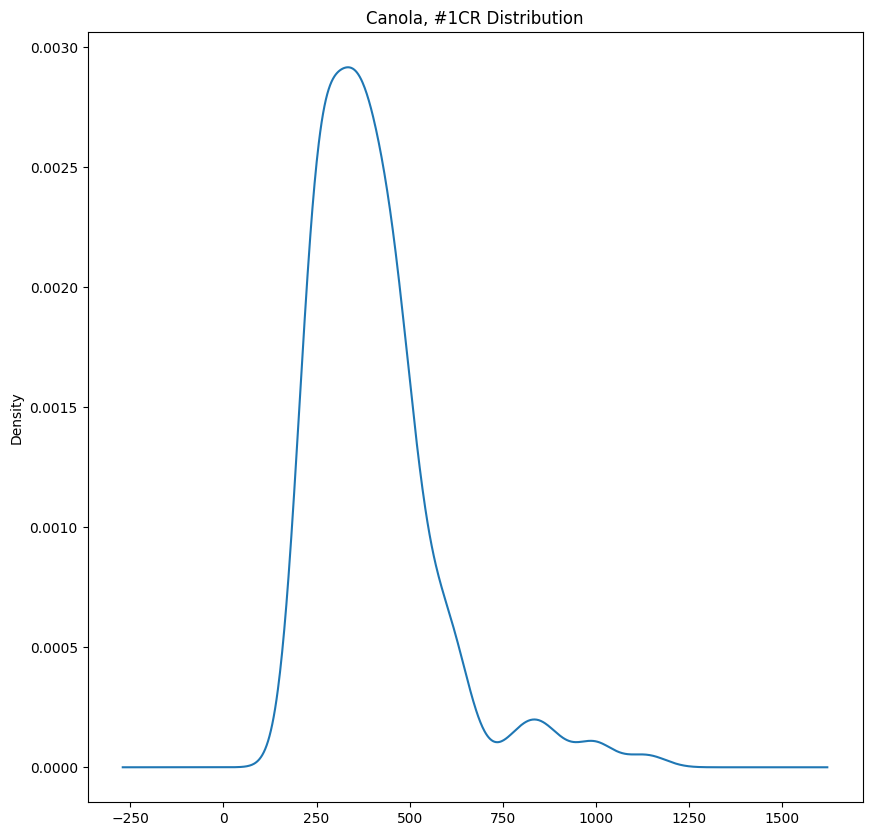

In [17]:
series.plot(kind='kde')
plt.title(name + ' Distribution')
# plt.savefig(folder+'dist.png')
# plt.clf()
plt.show()

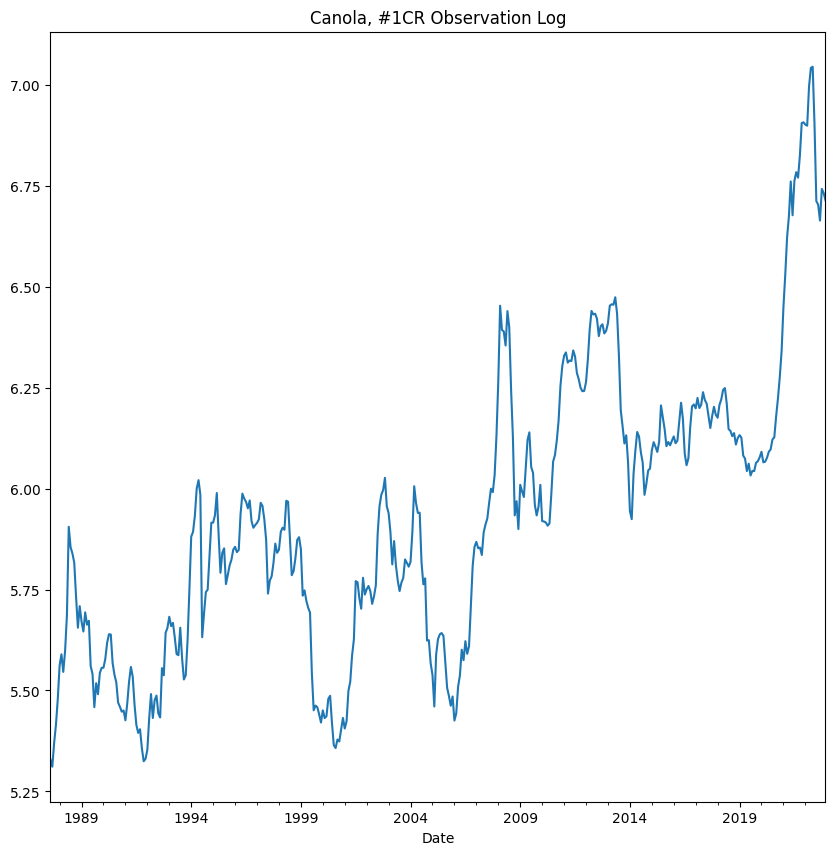

In [18]:
series.apply(lambda x: np.log(x)).plot()
plt.title(name + ' Observation Log')
# plt.savefig(folder+'observation_log.png')
# plt.clf()
plt.show()


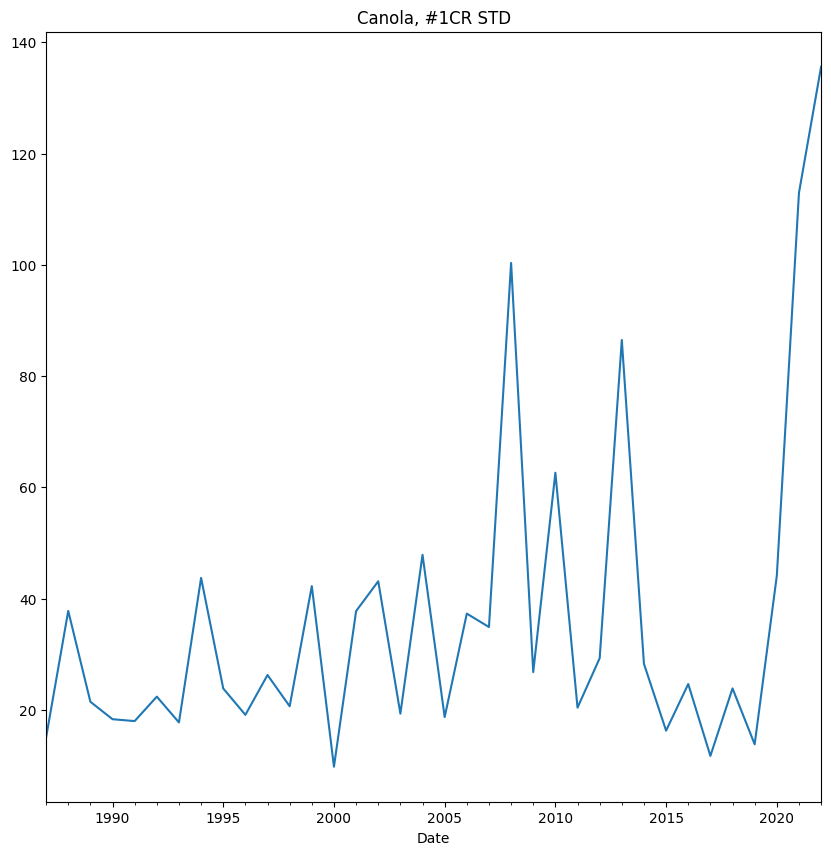

In [19]:
series.resample('Y').std().plot()
plt.title(name + ' STD')
# plt.savefig(folder+'std.png')
# plt.clf()
plt.show()

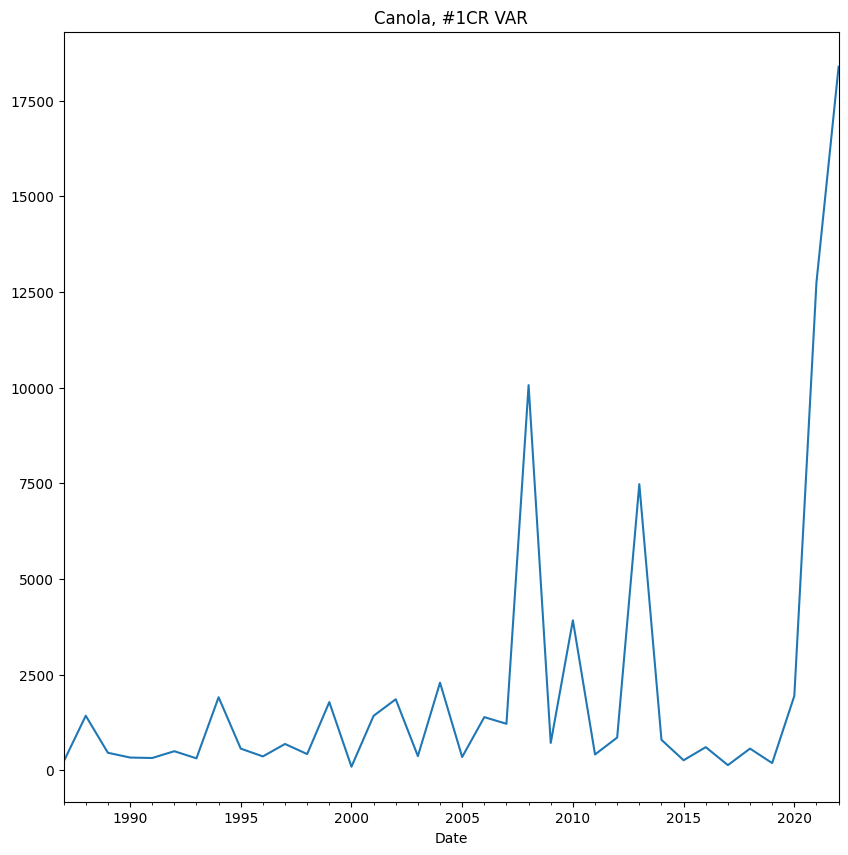

In [20]:
series.resample('Y').var().plot()
plt.title(name + ' VAR')
# plt.savefig(folder+'var.png')
# plt.clf()
plt.show()

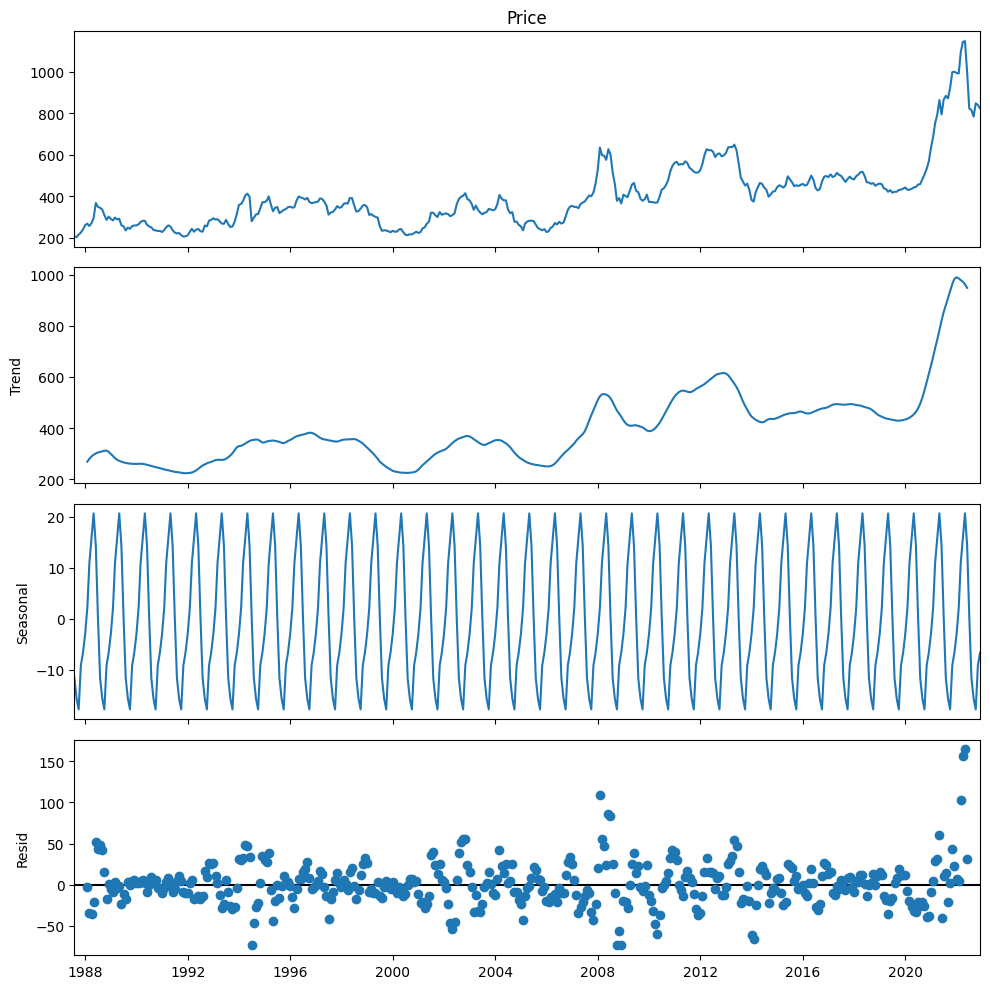

In [21]:
result = seasonal_decompose(series, model='additive')
print(result)
result.plot()
# plt.savefig('univariate_additive.png')
# plt.clf()
plt.show()

In [22]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller Test
result = adfuller(d)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -1.7504675425487595
p-value: 0.40531538397410427
Critical Values: {'1%': -3.4463612216221775, '5%': -2.8685980017932917, '10%': -2.5705296947685605}


<Figure size 1200x500 with 0 Axes>

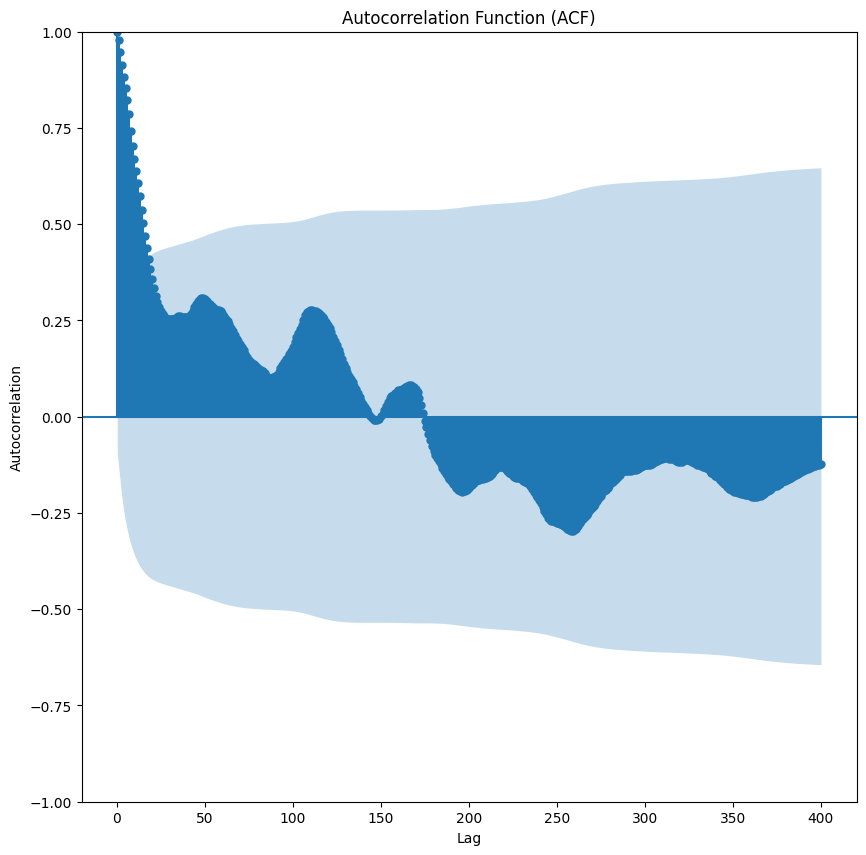

<Figure size 1200x500 with 0 Axes>

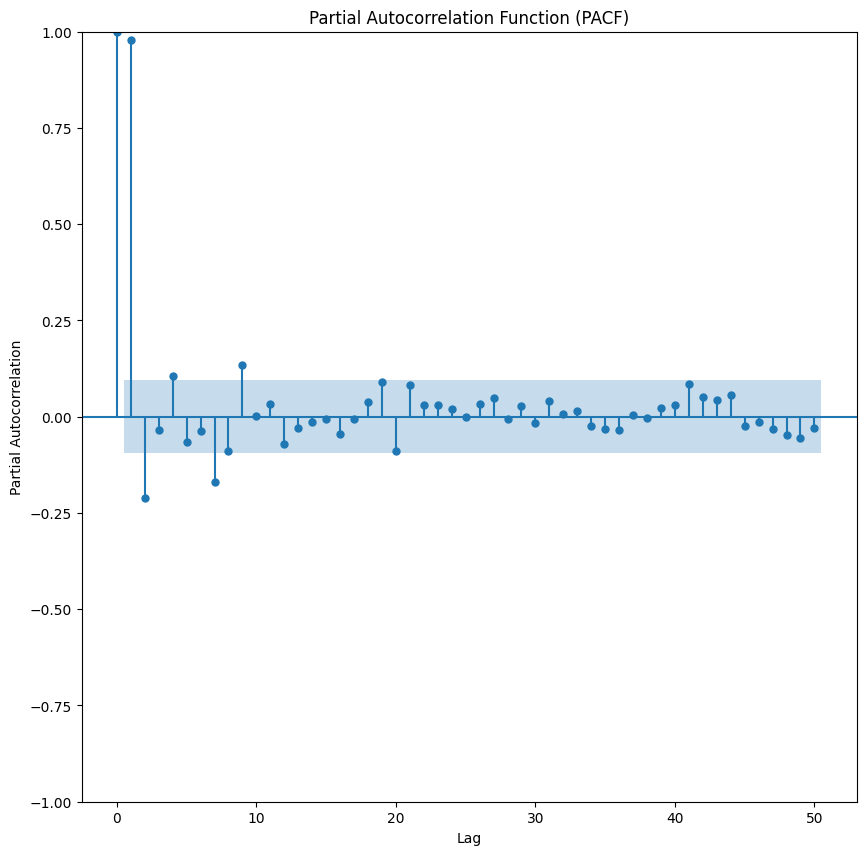

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


plt.figure(figsize=(12, 5))
plot_acf(d, lags=400)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()


plt.figure(figsize=(12, 5))
plot_pacf(d, lags=50)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [ ]:

arima_best_prediction = 0


def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.6)
    train, test = X[0:train_size], X[train_size:]
    history = [np.log(x) for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(np.exp(yhat))
        history.append(np.log(test[t]))
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    mape = MAPE(test, predictions)
    print('working on: ', arima_order)
    plt.plot(test)
    plt.plot(predictions, color='red')
    plt.title(name+' '+str(arima_order))
    plt.savefig(folder+'order plots/'+str(arima_order)+'.png')
    plt.clf()
    return rmse,mape, predictions

def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_mape ,best_cfg = float("inf"),float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse, mape, predictions = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                        best_mape = mape
                        arima_best_prediction = predictions
                        print('ARIMA%s RMSE=%.3f' % (order,rmse))
                        print('ARIMA%s MAPE=%.3f' % (order,mape))
                        print(arima_best_prediction)
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f MAPE=%.3f' % (best_cfg, best_score, best_mape))



mean_price = d.mean()
print('mean price: ', mean_price)


series.index = series.index.to_period('M')
p_values = [0,1,2,10,20]
d_values = range(0,3)
q_values = range(0,3)
evaluate_models(series.values, p_values, d_values, q_values)


mean price:  Price    401.812231
dtype: float64
working on:  (0, 0, 0)
ARIMA(0, 0, 0) RMSE=251.308
ARIMA(0, 0, 0) MAPE=33.021
[304.0122720572197, 304.3115684305768, 304.5270986161431, 304.87058971232136, 305.1927472864857, 305.4963387266652, 305.88221269820065, 306.34680458272265, 306.8302834963441, 307.2112414785252, 307.57272329149924, 307.83996924134993, 308.07539624201803, 308.3335917939461, 308.65276298894776, 308.86716742078033, 309.0791101295264, 309.2866870126952, 309.4840081499071, 309.6860818281335, 309.96823122535045, 310.3400441014151, 310.72739245188217, 311.1526662789129, 311.6313942455519, 312.2023935829375, 312.8246883001882, 313.4729797975043, 314.1271522209402, 314.7499216185032, 315.3754853702961, 315.99640561452566, 316.64319062117204, 317.2699594741398, 317.84904234772614, 318.40844152046066, 318.9417099772042, 319.4626814960571, 319.98153538502504, 320.521923747635, 321.1204217709385, 321.7960822964423, 322.51900551167796, 323.229333612726, 323.9383524716438, 324.

# LSTM

In [12]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout
from math import sqrt
from matplotlib import pyplot
import numpy
from keras import optimizers



# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
  df = DataFrame(data)
  columns = [df.shift(i) for i in range(1, lag+1)]
  columns.append(df)
  df = concat(columns, axis=1)
  df.fillna(0, inplace=True)
  return df

# create a differenced series
def difference(dataset, interval=1):
  diff = list()
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
  return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
  # fit scaler
  scaler = MinMaxScaler(feature_range=(-1, 1))
  scaler = scaler.fit(train)
  # transform train
  train = train.reshape(train.shape[0], train.shape[1])
  train_scaled = scaler.transform(train)
  # transform test
  test = test.reshape(test.shape[0], test.shape[1])
  test_scaled = scaler.transform(test)
  return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
  new_row = [x for x in X] + [value]
  array = numpy.array(new_row)
  array = array.reshape(1, len(array))
  inverted = scaler.inverse_transform(array)
  return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
  X, y = train[:, 0:-1], train[:, -1]
  X = X.reshape(X.shape[0], 1, X.shape[1])
  model = Sequential()
  model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True,return_sequences=True))
  model.add(Dropout(0.2))
  model.add(LSTM(neurons, return_sequences=True))
  model.add(Dropout(0.2))
  model.add(LSTM(neurons, return_sequences=True))
  model.add(Dropout(0.2))
  model.add(LSTM(neurons,return_sequences=True))
  model.add(Dropout(0.2))
  model.add(LSTM(neurons,return_sequences=True))
  model.add(Dropout(0.2))
  model.add(LSTM(neurons,return_sequences=True))
  model.add(Dropout(0.2))
  model.add(Dense(units=32, activation='tanh'))
  model.add(Dense(units=1))
  # sgd = optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True)
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mape'])
  for i in range(nb_epoch):
    history = model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
    print(i)
    # print(history.history.keys())
    # summarize history for loss
    # plt.plot(history.history['mse'])
    # plt.title('model loss')
    # plt.ylabel('loss')
    # plt.xlabel('epoch')
    # plt.legend(['train', 'test'], loc='upper left')
    # plt.show()
    model.reset_states()

  return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
  X = X.reshape(1, 1, len(X))
  yhat = model.predict(X, batch_size=batch_size)
  return yhat[0,0]



# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)
# diff_values = raw_values

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values


train_size = int(len(supervised_values) * 0.8)

train, test = supervised_values[0:train_size], supervised_values[train_size:]
print(len(raw_values))
print(len(supervised_values))

# split data into train and test-sets
# train, test = supervised_values[0:-12], supervised_values[-12:]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# repeat experiment
repeats = 1
error_scores = list()
lstm_predictions = list()

# fit the model
lstm_model = fit_lstm(train_scaled,1, 150, 30)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
# walk-forward validation on the test data

for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	lstm_predictions.append(yhat)








<ipython-input-12-12d921d6261e>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


425
424
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
1/1 [==============================] - 0s 33ms/step


In [11]:
print(lstm_predictions)
rmse = sqrt(mean_squared_error(raw_values[train_size+1:], lstm_predictions))
mape = MAPE(raw_values[train_size+1:], lstm_predictions)
print('Test RMSE: %.3f' % (rmse))
print('Test MAPE: %.3f' % (mape))
error_scores.append(rmse)

[443.286629881572, 457.56983859339283, 459.9295397377148, 450.29111592804446, 462.6391686465935, 489.0846160481799, 508.8838836173585, 471.26456897462907, 428.1284230390227, 426.7401442382839, 427.1832484909393, 485.78551017804983, 509.2205691763593, 484.93686949807545, 495.37213038576425, 516.2230757550115, 477.71463454225534, 501.18056576927484, 521.8684193011081, 504.56139494158487, 507.2654908383367, 481.4074090352033, 466.71453916609113, 491.1547283061306, 500.7180334513375, 487.34343731057453, 489.9918055550286, 512.9906263517645, 509.40705019977304, 524.5170789962891, 528.0925856929812, 481.87972491226793, 468.034653431544, 500.4429422531915, 451.2233512315703, 462.03989884507627, 450.5582692673115, 461.229565513762, 466.135684404606, 458.6236585683791, 428.15203818323556, 433.90541096562833, 421.4476308103827, 434.3024381634098, 421.3685291280047, 428.14304670112585, 430.47927430216686, 436.15817855320057, 435.16245133462496, 438.1149378327626, 441.52357225307173, 427.889795481

In [14]:
print(lstm_predictions)
rmse = sqrt(mean_squared_error(raw_values[train_size+1:], lstm_predictions))
mape = MAPE(raw_values[train_size+1:], lstm_predictions)
print('Test RMSE: %.3f' % (rmse))
print('Test MAPE: %.3f' % (mape))
error_scores.append(rmse)

[450.5130667817165, 453.141328034661, 459.40290811716056, 449.30444551164834, 457.9847640528501, 493.7259611746523, 512.3910826654827, 478.9669936841838, 411.69481923048556, 416.4967468930669, 435.6444688172903, 474.32760725743117, 494.96839992196317, 488.87397121280753, 481.60854199850405, 510.87508727401143, 490.1206493888783, 498.81291825840725, 526.2572926392338, 503.28284576904935, 500.9497885791724, 483.711659006282, 472.22741143384775, 501.5269386058572, 503.3433633801565, 485.79678699112867, 486.8456817157247, 510.63256427395913, 509.56771943228307, 521.8910878286208, 521.9147989652138, 489.7373277886089, 463.3504897159207, 463.8981986892731, 467.5051889163879, 465.2363915416148, 446.3878948848231, 469.5892970628946, 471.6468301979695, 461.80706354318056, 435.508543042236, 440.6173901247451, 426.16401262985624, 438.22001688546214, 418.53860607967795, 432.0573360972703, 428.8720447205016, 440.23740149769867, 437.90081262263976, 443.79850334287914, 450.06273610876787, 432.4608004

# Random Forest

<class 'list'>
419
>expected=400.8, predicted=400.5
>expected=395.2, predicted=398.9
>expected=424.7, predicted=372.5
>expected=455.2, predicted=416.3
>expected=463.8, predicted=437.9
>expected=425.8, predicted=500.0
>expected=419.5, predicted=436.5
>expected=387.5, predicted=427.6
>expected=377.6, predicted=370.2
>expected=385.6, predicted=368.8
>expected=407.3, predicted=370.5
>expected=372.3, predicted=397.7
>expected=372.0, predicted=371.0
>expected=371.0, predicted=368.0
>expected=368.1, predicted=370.4
>expected=370.1, predicted=370.5
>expected=397.8, predicted=370.8
>expected=431.5, predicted=375.5
>expected=438.4, predicted=439.9
>expected=454.5, predicted=441.6
>expected=477.8, predicted=446.0
>expected=520.3, predicted=477.0
>expected=546.3, predicted=513.6
>expected=560.9, predicted=582.2
>expected=565.5, predicted=578.7
>expected=551.3, predicted=571.1
>expected=554.3, predicted=561.5
>expected=553.5, predicted=556.0
>expected=568.3, predicted=550.9
>expected=559.6, predict

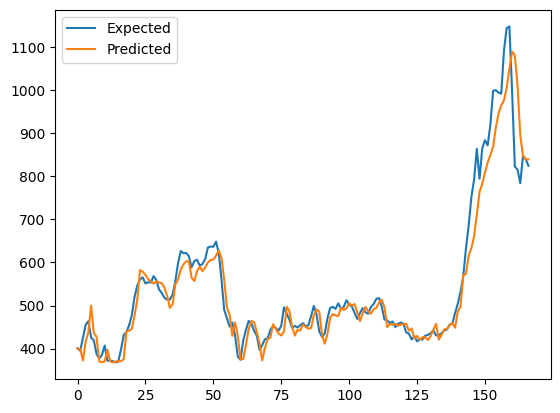

In [ ]:
# forecast monthly births with random forest
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = RandomForestRegressor(n_estimators=1000, max_depth=50, min_samples_split=5, min_samples_leaf= 2)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict([testX])
	return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = random_forest_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = sqrt(mean_squared_error(test[:, -1], predictions))
	return error, test[:, -1], predictions

# load the dataset
# series = read_csv('daily-total-female-births.csv', header=0, index_col=0)
values = list(series.values)
print(type(values))
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=6)

# evaluate
print(int(len(data)))
mae, y, yhat = walk_forward_validation(data, int(len(data) * 0.4))
print('MAE: %.3f' % mae)
# plot expected vs predicted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

# Comparison Plot

85


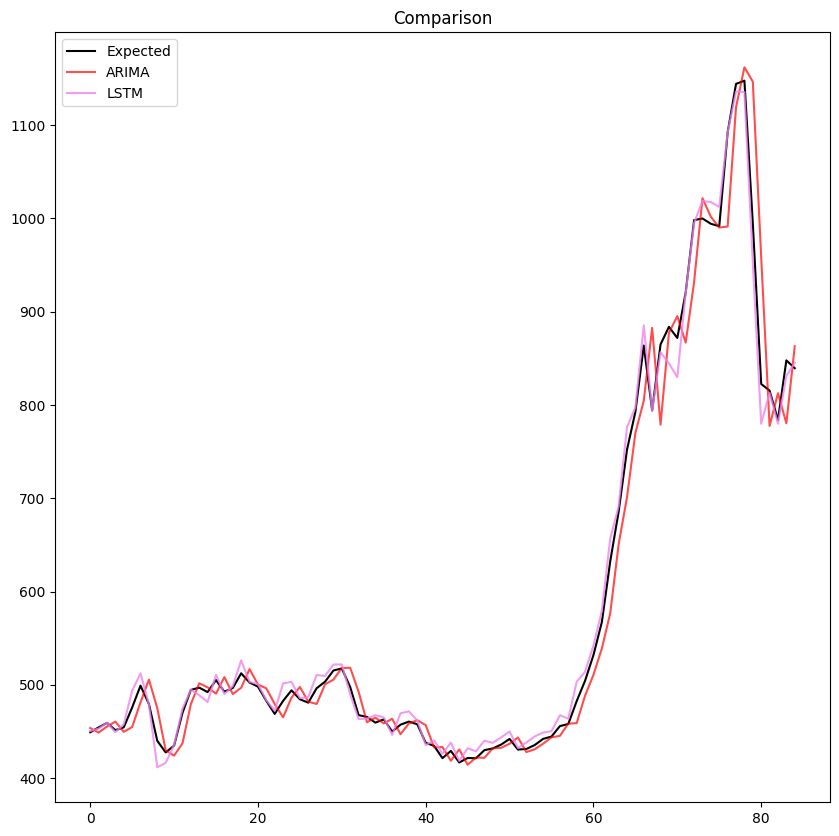

In [39]:
arima_pred = [361.2092566511062, 393.16632126614945, 361.6950178435667, 414.6013388003262, 402.4859105845739, 392.5721570962324, 430.7884623840636, 463.6031390754836, 466.11624315835024, 417.9073972702157, 416.6633092531775, 381.9404477976886, 374.20345470985274, 387.6152396077686, 412.5766106806119, 366.2021420218708, 369.88589659685357, 371.7126930034773, 367.4852145777552, 370.3182105134454, 403.8371565078296, 440.1182447745401, 440.542718304763, 457.2325538529805, 483.46323345689166, 530.411857641347, 553.3415809458763, 563.9438324199419, 566.5015921374984, 548.2648560805328, 554.1889348194289, 553.9240855367549, 571.2970641476226, 558.4796016112596, 532.0614114563286, 526.8584656595177, 516.0960181982102, 512.3702810630278, 514.1018607256877, 528.0982600686989, 562.9421719530162, 608.9952565937034, 634.1693335636419, 620.1431116193241, 621.6611538335017, 613.1767157385586, 583.0378695157618, 605.5610739748178, 608.356471630439, 589.4385353582919, 596.6390632011451, 611.1005490851882, 641.2654938150567, 638.4632514897346, 635.5374968038651, 650.9540555816984, 617.0434156429112, 546.6151055791644, 473.5895547871081, 465.3556719966193, 447.86058729696015, 462.0354831447988, 424.74314973869343, 369.7605812657229, 371.2291228853088, 431.0898826135949, 451.27351947411137, 468.660074134614, 458.03234270208065, 436.692208600981, 427.4604550677899, 389.85281879658044, 409.79562366239384, 426.9107706962483, 424.5005801625149, 447.83800720182643, 455.7762218242543, 446.1691053682836, 440.1491322302442, 455.69636600952333, 507.5636981706222, 478.99295635654164, 462.7097925226124, 443.8569370765116, 453.815388805025, 448.9225248717751, 455.3427982517818, 460.67265892757456, 449.6822786388212, 454.81762145820755, 481.3852757322477, 505.6985467434555, 474.9936971409648, 429.8902492779191, 424.1338200984067, 437.29864339941173, 479.3668084864793, 501.74264979140855, 497.3239961513993, 490.6311836709746, 508.3839288580497, 490.1802657650424, 496.9012723710023, 516.9503256377557, 500.4299239168325, 496.3180645446981, 479.45333557883373, 465.2116224168275, 486.406272156604, 497.76437969864224, 482.05618733263964, 479.55361637912233, 500.62484832876237, 505.6337967624713, 518.1275298176524, 518.3909192561091, 492.68004608357506, 459.93251726072396, 464.8998871611485, 458.72788422818496, 463.6596370831293, 447.1414448091696, 458.73625473974664, 462.07147356314306, 456.90359124278024, 433.0282347432754, 433.4171019518523, 418.66554242423325, 430.8048100232405, 414.4115481650088, 422.1692829452805, 421.87522757125384, 432.0368409704251, 432.59179463618267, 436.91246436226356, 443.65952070671074, 427.99679776171934, 430.9964196964934, 436.9631811880774, 443.8253493526122, 445.3444488361546, 458.505810527845, 458.9794630484888, 488.4580737185248, 510.7347059018643, 538.9457925341856, 576.7043530022818, 650.4813024351952, 701.1341130313147, 769.9936988950932, 804.5760847559474, 882.7392299257219, 778.9649792511418, 877.4247210857359, 895.3499334988159, 866.9024075016276, 931.8987584871642, 1021.807319630587, 1001.707628908928, 990.2761074006823, 991.3513408097741, 1119.2510356319078, 1162.0819356569525, 1146.7238663384007, 958.4671236174673, 777.6202639926856, 812.689557422037, 780.4554133083795, 863.0280767944175, 841.1790337757712]
lstm_pred = [450.5130667817165, 453.141328034661, 459.40290811716056, 449.30444551164834, 457.9847640528501, 493.7259611746523, 512.3910826654827, 478.9669936841838, 411.69481923048556, 416.4967468930669, 435.6444688172903, 474.32760725743117, 494.96839992196317, 488.87397121280753, 481.60854199850405, 510.87508727401143, 490.1206493888783, 498.81291825840725, 526.2572926392338, 503.28284576904935, 500.9497885791724, 483.711659006282, 472.22741143384775, 501.5269386058572, 503.3433633801565, 485.79678699112867, 486.8456817157247, 510.63256427395913, 509.56771943228307, 521.8910878286208, 521.9147989652138, 489.7373277886089, 463.3504897159207, 463.8981986892731, 467.5051889163879, 465.2363915416148, 446.3878948848231, 469.5892970628946, 471.6468301979695, 461.80706354318056, 435.508543042236, 440.6173901247451, 426.16401262985624, 438.22001688546214, 418.53860607967795, 432.0573360972703, 428.8720447205016, 440.23740149769867, 437.90081262263976, 443.79850334287914, 450.06273610876787, 432.46080048189003, 438.24823645705527, 444.73124324966915, 448.95725923466193, 450.4025889242587, 467.5428001608841, 463.743329184306, 503.44838104342926, 514.0483405327607, 542.1285042985114, 579.4574758589434, 656.6302921327949, 691.4692044095844, 776.4145330619515, 797.3303422043101, 885.4331639862658, 793.6057558428581, 856.6707894322941, 844.6640281001473, 829.7975667680979, 920.5605698384854, 995.0383415238347, 1018.8362129576705, 1017.4795000523686, 1012.506848230844, 1092.1672687827418, 1136.0746627884164, 1135.5798509688773, 952.2763547128179, 779.9829233513123, 813.1581183152655, 779.9400994791802, 831.2043744051492, 845.2932459109243]
print(len(arima_pred[-86:-1]))

pyplot.plot(raw_values[-86:-1], label='Expected', color='black')
pyplot.plot(arima_pred[-86:-1], label='ARIMA',color='red',alpha=0.7)
pyplot.plot(lstm_pred, label='LSTM', color ='violet',alpha=0.8)
pyplot.legend()
pyplot.title('Comparison')
pyplot.show()